In [63]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np
import matplotlib.pyplot as plt

def generate_random_numbers(n, mu, sigma, dist="normal"):
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu-sigma/(3**(1/2)),mu+sigma/(3**(1/2)),n)
        pass
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")

In [64]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [69]:
# IGD, the ordering is permitted to have replacement. 
#
# set fi
fi=lambda x,y: (1/2)*(x-y)**2
def IGD_wr_task1(y):
    n=len(y)
    ordering=np.random.choice(n, n, replace=True)
    x=0
    xvalue=np.zeros(n)
    fvalue=np.zeros(n)
    xvalue[0]=x
    fvalue[0]=np.array([fi(x,y[j]) for j in range(n)]).sum()
    for i in range(n-1):
        gamma=1/(1+i)
        ytemp=y[ordering[i]]    
        x-=gamma*(x-ytemp)
        f=np.array([fi(x,y[j]) for j in range(n)]).sum()
        xvalue[i+1]=x
        fvalue[i+1]=f
    return x, fvalue, xvalue
    pass
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n=len(y)
    ordering=np.random.choice(n, n, replace=False)
    x=0
    xvalue=np.zeros(n)
    fvalue=np.zeros(n)
    xvalue[0]=x
    fvalue[0]=np.array([fi(x,y[j]) for j in range(n)]).sum()
    for i in range(n-1):
        gamma=1/(1+i)
        ytemp=y[ordering[i]]  
        x-=gamma*(x-ytemp)
        f=np.array([fi(x,y[j]) for j in range(n)]).sum()
        xvalue[i+1]=x
        fvalue[i+1]=f
    return x, fvalue, xvalue
    pass

In [86]:
#get value and ready to plot
x_wr_normal, fvalue_wr_normal, xvalue_wr_normal = IGD_wr_task1(y1)
x_wo_normal, fvalue_wo_normal, xvalue_wo_normal = IGD_wo_task1(y1)
x_wr_uniform, fvalue_wr_uniform, xvalue_wr_uniform = IGD_wr_task1(y2)
x_wo_uniform, fvalue_wo_uniform, xvalue_wo_uniform = IGD_wo_task1(y2)

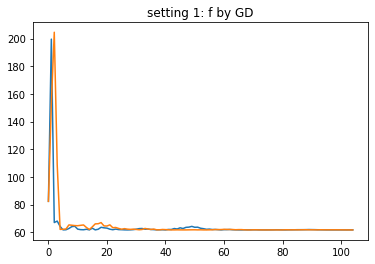

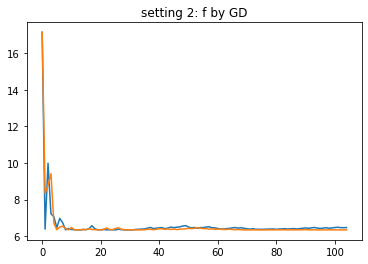

In [132]:
import matplotlib.pyplot as plt
plt.title("setting 1: f by GD")
plt.plot(range(len(y1)), fvalue_wr_normal, range(len(y1)), fvalue_wo_normal)
plt.show()

plt.title("setting 2: f by GD")
plt.plot(range(len(y2)), fvalue_wr_uniform, range(len(y2)), fvalue_wo_uniform)
plt.show()

The without replacement ordering method is better.

Task 2


In [89]:
# IGD, the ordering is permitted to have replacement. 
#
#
# generate the setting
beta=np.random.uniform(1, 2, 100)
y=5
beta_min = min(beta)
def IGD_wr_task2(beta, y):
    n=len(beta)
    ordering=np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x=0
    fi=lambda x,b: (1/2)*b*(x-y)**2
    xvalue=np.zeros(n)
    fvalue=np.zeros(n)
    xvalue[0]=x
    fvalue[0]=np.array([fi(x,beta[j]) for j in range(n)]).sum()
    gamma=0.05*beta_min

    for i in range(n-1):
        b=beta[ordering[i]]
        x-=gamma*b*(x-y)
        f=np.array([fi(x,beta[j]) for j in range(n)]).sum()
        xvalue[i+1] = x
        fvalue[i+1] = f
    return x, fvalue, xvalue
    pass


def IGD_wo_task2(beta, y):
    n=len(beta)
    ordering=np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    x=0
    fi=lambda x,b: (1/2)*b*(x-y)**2
    xvalue=np.zeros(n)
    fvalue=np.zeros(n)
    xvalue[0]=x
    fvalue[0]=np.array([fi(x,beta[j]) for j in range(n)]).sum()
    gamma=0.05*beta_min
    for i in range(n-1):
        b=beta[ordering[i]]
        x-=gamma*b*(x-y)
        f=np.array([fi(x,beta[j]) for j in range(n)]).sum()
        xvalue[i+1] = x
        fvalue[i+1] = f 
    return x, fvalue, xvalue
    pass

In [102]:
x_wr_task2, fvalue_wr_task2, xvalue_wr_task2 = IGD_wr_task2(beta,y)
x_wo_task2, fvalue_wo_task2, xvalue_wo_task2 = IGD_wo_task2(beta,y)

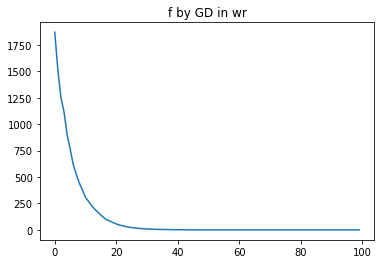

In [103]:
plt.title("f by GD in wr")
plt.plot(range(len(beta)), fvalue_wr_task2)
plt.show()

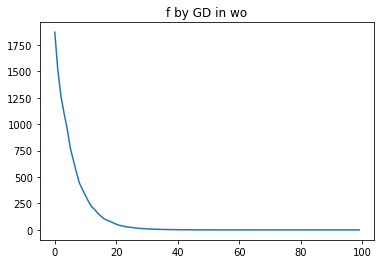

In [104]:
plt.title("f by GD in wo")
plt.plot(range(len(beta)), fvalue_wo_task2)
plt.show()

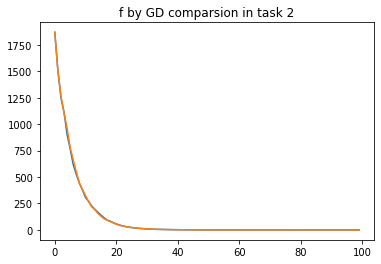

In [105]:
plt.title("f by GD comparsion in task 2")
plt.plot(range(len(beta)), fvalue_wr_task2, range(len(beta)), fvalue_wo_task2)
plt.show()

By two plots and one comparing plots, we can see the without replacing ordering method is better.

**Task 3**

In [108]:
# generation of exact solution and data y and matrix A.
def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [109]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [125]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
import copy
def IGD_wr_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    m=len(y)
    n=np.shape(A)[1]
    ordering=np.random.choice(n, n, replace=True)
    x= np.zeros(n)
    xvalue=[]
    fvalue=[]
    xvalue.append(copy.deepcopy(x))
    F= lambda x: np.matmul(A, x)-y ## Ax-y, an m*1 vector, need to sum the square of each entry
    fvalue.append(np.array([F(x)[t]**2 for t in range(m)]).sum())
    for i in range(n-1):
        gamma=0.001
        ytemp=y[ordering[i]]
        ai=A[ordering[i]]
        x -= gamma*(np.matmul(ai, x)-ytemp)*ai
        f = np.array([F(x)[t]**2 for t in range(m)]).sum()
        xvalue.append(copy.deepcopy(x))
        fvalue.append(f)
        
    return x, fvalue, xvalue
    pass


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    m=len(y)
    n=np.shape(A)[1]
    ordering=np.random.choice(n, n, replace=False)
    x=np.zeros(n)
    xvalue=[]
    fvalue=[]
    xvalue.append(copy.deepcopy(x))
    F= lambda x: np.matmul(A, x)-y 
    fvalue.append(np.array([F(x)[t]**2 for t in range(m)]).sum())
    for i in range(n-1):
        gamma=0.001
        ytemp=y[ordering[i]]
        ai=A[ordering[i]]
        x-=gamma*ai*(np.matmul(ai, x)-ytemp)
        f=np.array([F(x)[t]**2 for t in range(m)]).sum()
        xvalue.append(copy.deepcopy(x))
        fvalue.append(f)         
    return x, fvalue, xvalue
    pass

In [126]:
#set the values
x_wr, fvalue_wr, xvalue_wr=IGD_wr_task3(y, A)
x_wo, fvalue_wo, xvalue_wo=IGD_wo_task3(y, A)

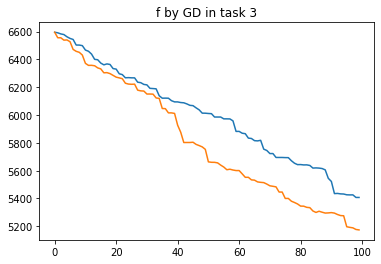

In [133]:
plt.title("f by GD in task 3")
plt.plot(range(100),fvalue_wr,range(100), fvalue_wo)
plt.show()

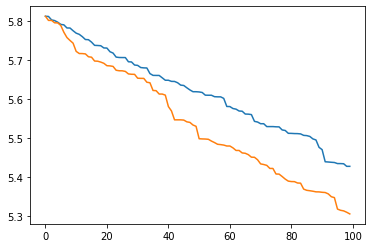

In [134]:
#change code to plot the histories of  ‖𝑥𝑘−𝑥∗‖
norm_wr=np.array([np.linalg.norm(xvalue_wr[j]-xstar) for j in range(100)])
norm_wo=np.array([np.linalg.norm(xvalue_wo[j]-xstar) for j in range(100)])
plt.plot(range(100),norm_wr,range(100), norm_wo)
plt.show()

The without replacement ordering method is better. And when we change our code to plot the histories of  ‖𝑥𝑘−𝑥∗‖  and compare the results about the convergences, the result is the same.